# Задание 1. Использование предобученной модели

## 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [8]:
import matplotlib.pyplot as plt
from tensorflow import keras

model = keras.applications.MobileNetV2()

model.summary() # Вывод краткого описания архитектуры созданной модели
model.get_config() # Вывод конфигурации созданной модели

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

{'name': 'mobilenetv2_1.00_224',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_2'},
   'name': 'input_2',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'Conv1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (2, 2),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': False,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'Conv1',
   'inbound_nodes': [[['input_2', 0, 0, {}]]]},
  {'class_name': 'BatchNo

## 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

In [53]:
from urllib.request import urlopen
import cv2
import numpy as np

imageUrls = [
    # 1. Виолончель
    "https://thumbs.static-thomann.de/thumb/padthumb600x600/pics/bdb/278802/14033132_800.jpg",
    # 2. Туалетная бумага
    "https://tork-images.essity.com/images-c5/4/258004/optimized-AzureJPG2K/240616-nowrap.jpg?w=800&h=800&imPolicy=dynamic",
    # 3. Черепаха
    "https://npr.brightspotcdn.com/dims4/default/75d8732/2147483647/strip/true/crop/700x394+0+0/resize/880x495!/quality/90/?url=http%3A%2F%2Fnpr-brightspot.s3.amazonaws.com%2F37%2F81%2Fe279df75486f906dd79aa6ca5074%2Fdiamondbackterrapinturtletoofwc.jpg",
    # 4. Английский фоксхаунд
    "https://www.purina.co.nz/sites/default/files/2021-07/english-foxhound-p.jpg",
    # 5. Губная помада
    "https://goldapple.ru/media/catalog/product/cache/fb5d06f7acfb2f26f85333624ccbfb5e/7/7/773602048496_1_l9ejhqww0uusrhnn.jpg"
    ]

images = []
for imageUrl in imageUrls:
    req = urlopen(imageUrl)
    image = np.asarray(bytearray(req.read()), dtype=np.uint8)
    image = cv2.imdecode(image, -1)
    images.append(image)

## 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС.

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [54]:
def normalize(images, shape):
  proc_images = []
  for image in images:
    proc_image = image.copy()
    proc_image = cv2.resize(proc_image, (shape[0], shape[1]))
    proc_images.append(proc_image)
  return np.asarray(proc_images)

## 1.4. Напишите функцию, принимающую на вход список с представлениями обработаннах изображений (результат работы функции из п. 1.3.) и возвращающую список предсказанных нейросетью классов. 

In [55]:
def predict(images):
    normalized_images = normalize(images, (224, 224, 3))
    preprcessed_images = keras.applications.mobilenet_v2.preprocess_input(normalized_images)
    prediction = model.predict(preprcessed_images)
    return prediction

In [56]:
def print_predict(preds, image):
    output = image.copy()

    height = 30
    margin = 30
    for pred in preds:
        height += margin
        text = "{}: {:.2f}%".format(pred[1], pred[2] * 100)
        _ = cv2.putText(output, text, (10, height), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
            (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

## 1.5. Выведите изображения и соответствующие им классы, вызывая соответствующие функции

1/1 [==============================] - 0s 19ms/step


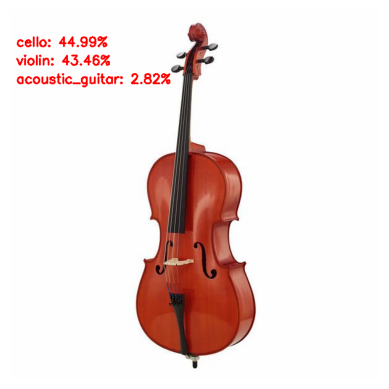

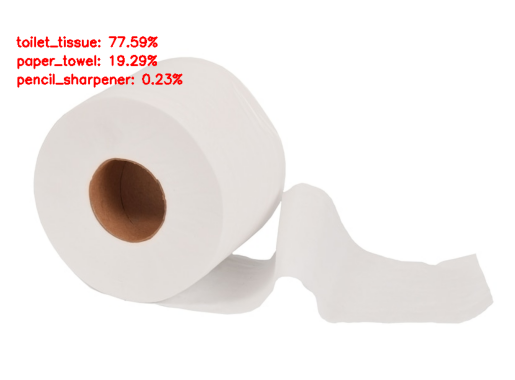

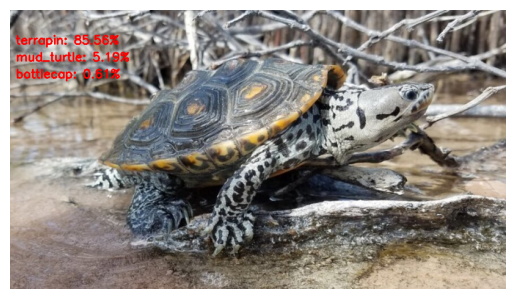

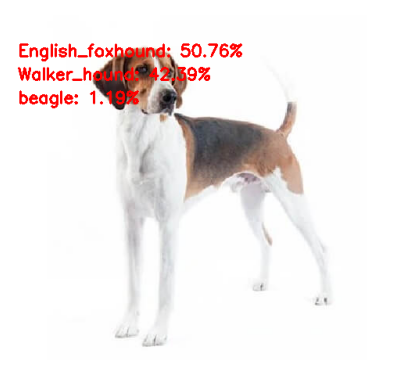

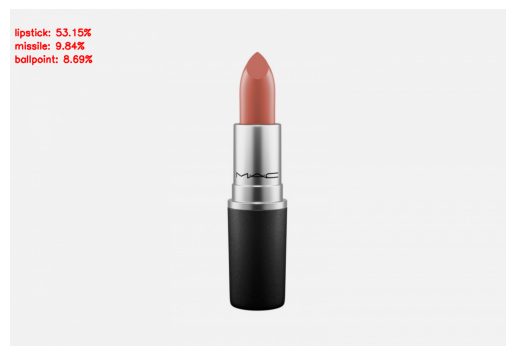

In [57]:
predictions = predict(images)
predictions = keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)
for i, preds in enumerate(predictions):
    print_predict(preds, images[i])

# Задание 2. Использование обученной модели для работы со своим датасетом

## 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras

model = keras.applications.MobileNetV2()

model.summary() # Вывод краткого описания архитектуры созданной модели
model.get_config() # Вывод конфигурации созданной модели

## 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку

In [ ]:
# Ваш код

## 2.3. Обучение своей модели на основе предобученной модели \*НАЗВАНИЕ_МОДЕЛИ\*

In [ ]:
# Ваш код

## 2.3. Создаем свою модель на основе \*НАЗВАНИЕ_МОДЕЛИ\*

In [ ]:
# Ваш код

## 2.4. Визуализация процесса обучения модели

In [ ]:
# Ваш код

## 2.5. Подготовьте набор проверочных данных см. Задание №1 (п. 1.2, 1.3, 1.4)

In [ ]:
# Ваш код

## 2.6. Организуйте вывод изображений и соответствующих им классов

In [ ]:
# Ваш код